In [9]:
import pandas as pd
import os
import yaml
from pathlib import Path

with open('config.yaml', 'r') as file:
    config = yaml.safe_load(file)
BASE_DIR = Path(config['base_dir'])
LOGS_DIR = BASE_DIR / "logs"

last_version = max([int(s.replace("version_", "")) for s in os.listdir(f"{LOGS_DIR}/lightning_logs")])
metrics = pd.read_csv(f"{LOGS_DIR}/lightning_logs/version_{last_version}/metrics.csv")

In [10]:
train_loss = metrics[['epoch', 'train_loss']].dropna().set_index('epoch')
val_loss = metrics[['epoch', 'val_loss']].dropna().set_index('epoch')

train_accuracy = metrics[['epoch', 'train_accuracy']].dropna().set_index('epoch')
val_accuracy = metrics[['epoch', 'val_accuracy']].dropna().set_index('epoch')

<Axes: xlabel='epoch'>

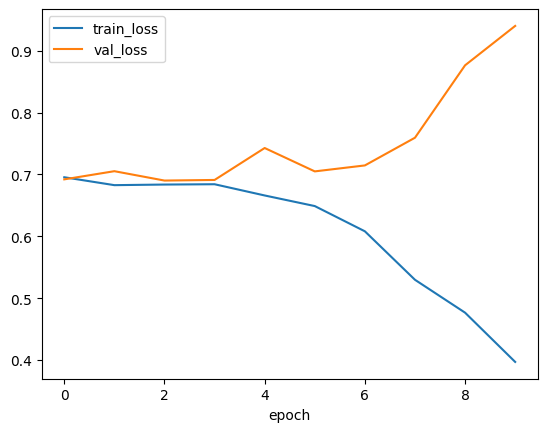

In [11]:
pd.concat([train_loss, val_loss], axis=1).plot()

<Axes: xlabel='epoch'>

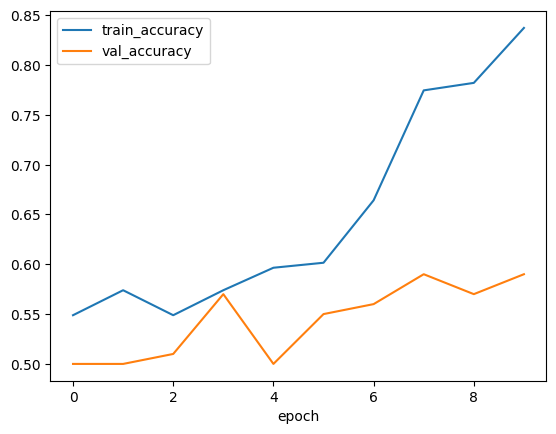

In [12]:
pd.concat([train_accuracy, val_accuracy], axis=1).plot()